#### Gender-Career IAT Cleaning

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import glob
import seaborn as sns

sns.set(style="white")

In [4]:
df_lst = []
files = glob.glob("data/gender_career_data/Gender*.sav")

for f in files:
    data = pd.read_spss(f)
    df_lst.append(data)

all_data = pd.concat(df_lst)    


In [11]:
all_data.count()

session_id        3159286
session_status    3159286
study_name        3159286
date              3159286
month             3159286
                   ...   
sius008             30789
sius009             30778
sius010             30772
sius011             30777
sius012             30762
Length: 192, dtype: int64

#### Removing Irrelevant / Incomplete Data 

In [12]:
to_drop = ['impcareer', 
           'impfamily', 
           'num_childunder18', 
           'actualduties', 
           'idealduties', 
           'primary1', 
           'num_primary1a', 
           'secondary1', 
           'num_secondary1a', 
           'surnameused', 
           'iatevaluations001', 
           'iatevaluations002', 
           'iatevaluations003', 
           'broughtwebsite', 
           'user_id', 
           'previous_session_id', 
           'previous_session_schema', 
           'havechildren', 
           'numboys', 
           'numgirls', 
           'planchildren', 
           'childunder18', 
           'primary1a', 
           'primary1aa', 
           'secondary1a', 
           'secondary1aa', 
           'q2a',
           'q2b',
           'q2c',
           'q2d',
           'q3a',
           'q3b',
           'q3c',
           'q4', 'politicalid_6',
           'femaleceos',
           'femalepres',
           'femalepres_2006',
           'religion',
           'femalepres_2007', 'hillary.hillary1',
           'hillary.hillary2',
           'hillary.hillary3',
           'hillary.hillary4',
           'hillary.hillary5',
           'hillary.hillary6',
           'hillary.hillary7',
           'hillary.hillary8',
           'hillary.hillary9',
           'hillary.hillary10','hillarycomp',
           'hillarytherm',
           'hillaryvote',
           'deathanxiety001',
           'deathanxiety002',
           'deathanxiety003',
           'deathanxiety004',
           'deathanxiety005',
           'deathanxiety006',
           'deathanxiety007',
           'deathanxiety008',
           'deathanxiety009',
           'deathanxiety010',
           'deathanxiety011',
           'deathanxiety012',
           'deathanxiety013',
           'deathanxiety014',
           'deathanxiety015',
           'fearcovid001',
           'fearcovid002',
           'fearcovid003',
           'fearcovid004',
           'fearcovid005',
           'fearcovid006',
           'fearcovid007',
           'fearcovid008',
           'pvd001',
           'pvd002',
           'pvd003',
           'pvd004',
           'pvd005',
           'pvd006',
           'pvd007',
           'pvd008',
           'pvd009',
           'pvd010',
           'pvd011',
           'pvd012',
           'pvd013',
           'pvd014',
           'pvd015',
           'sius001',
           'sius002',
           'sius003',
           'sius004',
           'sius005',
           'sius006',
           'sius007',
           'sius008',
           'sius009',
           'sius010',
           'sius011',
           'sius012', 
           'religion2009', 
           'religion2014', 'Order', 'Side_Career_34', 'Side_Male_34', 
           'D_biep.Male_Career_36', 'D_biep.Male_Career_47', 'Mn_RT_all_3',
           'Mn_RT_all_4', 'Mn_RT_all_6', 'Mn_RT_all_7', 'SD_all_3', 'SD_all_4', 
           'SD_all_6', 'SD_all_7', 'N_3', 'N_4', 'N_5', 'N_6', 'N_7', 
           'Mn_RT_correct_3', 'Mn_RT_correct_4', 'Mn_RT_correct_6', 
           'Mn_RT_correct_7', 'SD_correct_3', 'SD_correct_4', 'SD_correct_6', 
           'SD_correct_7', 'N_ERROR_3', 'N_ERROR_4', 'N_ERROR_6', 'N_ERROR_7']

In [13]:
removing_columns1 = all_data.drop(to_drop, axis=1)

In [15]:
comp1 = removing_columns1[removing_columns1['session_status']=='C']

In [16]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1627738 entries, 0 to 92163
Data columns (total 57 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   session_id              1627738 non-null  float64
 1   session_status          1627738 non-null  object 
 2   study_name              1627738 non-null  object 
 3   date                    1627738 non-null  float64
 4   month                   1627738 non-null  float64
 5   day                     1627738 non-null  float64
 6   year                    1627738 non-null  float64
 7   hour                    1627738 non-null  float64
 8   weekday                 1627738 non-null  float64
 9   birthmonth              841728 non-null   float64
 10  birthyear               817423 non-null   float64
 11  num_002                 844348 non-null   object 
 12  birthSex                604840 non-null   float64
 13  genderIdentity          635297 non-null   object 
 14  ethn

In [17]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = (p.get_x() + p.get_width() / 2)
                _y = (p.get_y() + p.get_height()) + 3_000
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
# Source: https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values

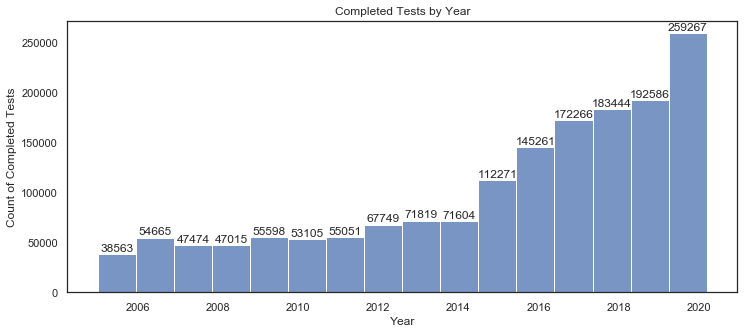

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

Fix Education Columns & Combine 


In [19]:
comp1.loc[:, 'edu_14'].fillna(comp1.edu_13, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
comp1.replace({'M.B.A.':'other advanced degree'}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
comp1.pivot_table(index='year', columns=['edu_14'], values='session_id', aggfunc='count')

edu_14,-999.0,J.D.,M.D.,Ph.D.,associate's degree,bachelor's degree,elementary school,high school graduate,junior high,master's degree,other advanced degree,some college,some graduate school,some high school
year,,,,,,,,,,,,,,
2005.0,NaN,628.0,196.0,831.0,1772.0,5195.0,58.0,1785.0,288.0,3163.0,643.0,9913.0,2370.0,3161.0
2006.0,NaN,842.0,402.0,1336.0,2852.0,7826.0,113.0,2643.0,620.0,4616.0,1411.0,13350.0,3576.0,5056.0
2007.0,NaN,665.0,360.0,1088.0,3062.0,7139.0,81.0,2731.0,322.0,3558.0,1337.0,14067.0,3070.0,4082.0
2008.0,NaN,851.0,412.0,1161.0,3148.0,6925.0,74.0,2671.0,284.0,3435.0,1351.0,13957.0,3217.0,4071.0
2009.0,NaN,846.0,436.0,1185.0,3701.0,8266.0,59.0,3324.0,438.0,3958.0,1718.0,16429.0,3565.0,5029.0
2010.0,NaN,697.0,418.0,1042.0,3883.0,7546.0,58.0,3473.0,359.0,3577.0,1476.0,16003.0,3271.0,4979.0
2011.0,NaN,1109.0,416.0,1220.0,4144.0,8511.0,49.0,3329.0,254.0,3948.0,1717.0,15410.0,3943.0,5147.0
2012.0,NaN,1230.0,535.0,1934.0,5148.0,10901.0,67.0,4205.0,325.0,5380.0,2723.0,18931.0,4020.0,5423.0
2013.0,NaN,1284.0,719.0,2955.0,4930.0,12514.0,56.0,3877.0,304.0,7287.0,3039.0,17910.0,4290.0,5262.0


In [22]:
comp1.drop(labels='edu_13', inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
comp1.drop(labels='edu', inplace=True, axis=1)

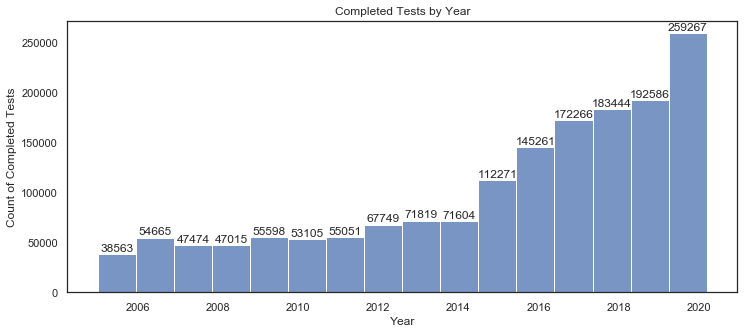

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

Remove participants with high rates of error (more than 30%) or with too many fast trials (more than 10%)

IF  (pct_300>10 OR PCT_error_3467>30) Error='Yes'.

In [112]:
comp1.drop(comp1.index[comp1['pct_300'] >10], inplace=True)

KeyError: 'pct_300'

In [26]:
comp1.drop(comp1.index[comp1['PCT_error_3467'] >30], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


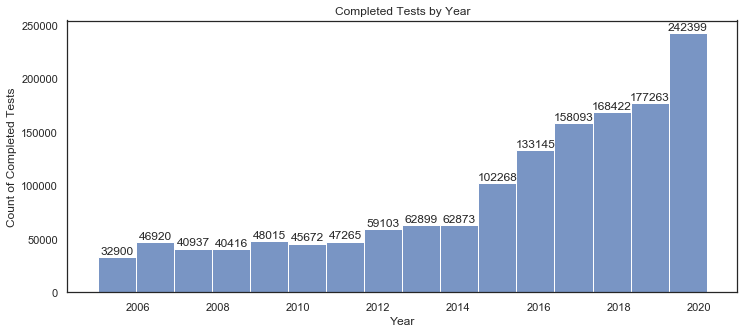

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [28]:
comp1.rename(columns={'D_biep.Male_Career_all': 'Implicit'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
comp1.drop(columns=['Mn_RT_all_3467', 'N_3467', 'PCT_error_3467', 'pct_300', 'pct_400', 'pct_2K', 'pct_3K', 'pct_4K'], inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
comp1.drop(columns=['birthmonth', 'num_002', 'major'], inplace=True, axis=1)

In [31]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 44 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   birthyear       759174 non-null   float64
 10  birthSex        561349 non-null   float64
 11  genderIdentity  588084 non-null   object 
 12  ethnicityomb    1238710 non-null  object 
 13  raceomb_002     720451 non-null   object 
 14  raceombmulti    879322 non-null   object 
 15  Implicit        1442690 non-null  float64
 16  assocareer      1367103 non-null  obje

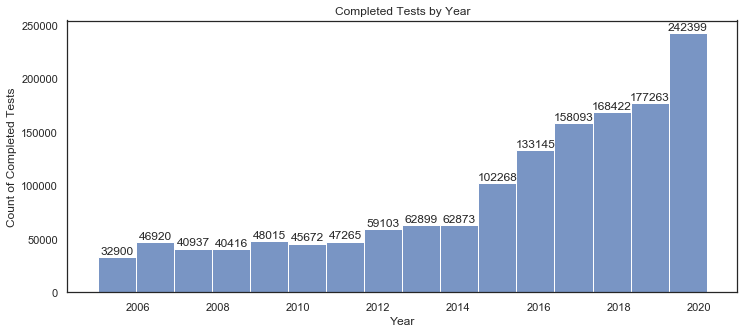

In [32]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

Occupation Fixes

In [33]:
comp1.pivot_table(index='year', columns=['occuself'], values='session_id', aggfunc='count')

occuself,,-999,.,Administrative Support,Arts/Design/Entertainment/Sports,Business,Computer/Math,Construction/Extraction,Education,Engineers/Architects,...,Military,Production,Protective Service,Repair/Installation,Sales,Science,Service and Personal Care,Social Service,Transportation,Unemployed
year,,,,,,,,,,,,,,,,,,,,,
2016.0,47953,11252,933,3534,2564,7664,3151,370,8973,3127,...,672,519,559,155,4615,2571,1023,1973,318,9108
2017.0,354,21321,122,6754,4623,15898,5619,628,16645,5808,...,1221,885,1292,284,8093,4468,1909,3629,624,17201


In [34]:
comp1.pivot_table(index='year', columns=['occuSelf'], values='session_id', aggfunc='count')

occuSelf,,.,Administrative Support,Arts/Design/Entertainment/Sports,Business,Computer/Math,Construction/Extraction,Education,Engineers/Architects,"Farming, Fishing, Forestry",...,Military,Production,Protective Service,Repair/Installation,Sales,Science,Service and Personal Care,Social Service,Transportation,Unemployed
year,,,,,,,,,,,,,,,,,,,,,
2018.0,128.0,23576.0,7245.0,4108.0,16795.0,6219.0,767.0,17801.0,6202.0,640.0,...,1392.0,1056.0,1176.0,409.0,8987.0,3915.0,2091.0,3923.0,852.0,18533.0
2019.0,25742.0,NaN,7859.0,4332.0,16013.0,6032.0,889.0,20101.0,6654.0,601.0,...,1966.0,1048.0,1093.0,404.0,8823.0,4122.0,2354.0,4466.0,828.0,19977.0
2020.0,34641.0,NaN,10340.0,6442.0,23445.0,8442.0,1326.0,26364.0,8875.0,942.0,...,2979.0,1581.0,1349.0,495.0,13040.0,6182.0,2867.0,6251.0,1280.0,25963.0


In [35]:
comp1.pivot_table(index='year', columns=['occupation'], values='session_id', aggfunc='count')

occupation,,.,Administrative Support - Financial Clerks,Administrative Support - Information and Records,"Administrative Support - Other Support (data entry, office clerk, proofreaders)","Administrative Support - Recording, Scheduling, Dispatching, Distributing",Administrative Support - Secretaries and Assistants,Administrative Support - Supervisors,Arts/Design/Entertainment/Sports - Art and Design,Arts/Design/Entertainment/Sports - Entertainers and Performers,...,Social Service - Religious Workers,Transportation - Air Transportation,Transportation - Material Moving,Transportation - Motor Vehicle Operators,Transportation - Other,Transportation - Rail Transport,Transportation - Supervisors,Transportation - Water Transport,Unemployed,null
year,,,,,,,,,,,,,,,,,,,,,
2006.0,184.0,35748.0,77.0,69.0,78.0,33.0,218.0,86.0,151.0,67.0,...,15.0,18.0,3.0,12.0,20.0,3.0,11.0,3.0,1690.0,30.0
2007.0,1.0,5895.0,226.0,161.0,330.0,90.0,726.0,294.0,391.0,189.0,...,59.0,53.0,23.0,34.0,49.0,5.0,14.0,9.0,4881.0,51.0
2008.0,NaN,5727.0,255.0,167.0,296.0,81.0,612.0,244.0,325.0,179.0,...,56.0,25.0,10.0,26.0,56.0,7.0,19.0,10.0,5219.0,23.0
2009.0,1.0,7009.0,267.0,176.0,352.0,98.0,812.0,260.0,386.0,191.0,...,65.0,39.0,15.0,38.0,74.0,14.0,14.0,10.0,7004.0,7.0
2010.0,2.0,6901.0,211.0,160.0,321.0,64.0,648.0,273.0,312.0,152.0,...,51.0,43.0,17.0,26.0,66.0,7.0,12.0,8.0,7432.0,5.0
2011.0,1.0,6638.0,213.0,150.0,342.0,88.0,695.0,338.0,283.0,151.0,...,49.0,26.0,19.0,38.0,74.0,6.0,13.0,6.0,7608.0,NaN
2012.0,NaN,7892.0,323.0,241.0,469.0,136.0,869.0,428.0,423.0,212.0,...,50.0,40.0,16.0,42.0,98.0,12.0,21.0,9.0,9434.0,NaN
2013.0,NaN,8455.0,307.0,213.0,520.0,147.0,915.0,433.0,430.0,205.0,...,56.0,37.0,19.0,28.0,83.0,29.0,24.0,3.0,8964.0,NaN
2014.0,NaN,7919.0,352.0,268.0,483.0,145.0,973.0,546.0,501.0,222.0,...,51.0,30.0,19.0,32.0,89.0,20.0,29.0,7.0,9310.0,NaN


In [36]:
arr = comp1["occupation"].to_numpy()
len(arr)

1468590

In [37]:
occuself_list = comp1['occuself'].unique()
occuself_list

array([nan, '-999', 'Legal', 'Social Service', 'Education', 'Management',
       'Arts/Design/Entertainment/Sports', 'Computer/Math', 'Unemployed',
       'Business', 'Administrative Support', 'Healthcare', 'Food service',
       'Sales', 'Construction/Extraction', 'Engineers/Architects',
       'Military', 'Protective Service', 'Maintenance', 'Science',
       'Production', 'Farming, Fishing, Forestry',
       'Service and Personal Care', 'Homemaker or Parenting',
       'Transportation', 'Repair/Installation', '.', ''], dtype=object)

In [38]:
occuSelf_list = comp1['occuSelf'].unique()
occuSelf_list

array(['.', 'Food service', 'Unemployed', 'Engineers/Architects',
       'Education', 'Sales', 'Healthcare', 'Computer/Math', 'Business',
       'Management', 'Social Service', 'Science',
       'Arts/Design/Entertainment/Sports', 'Legal',
       'Homemaker or Parenting', 'Administrative Support',
       'Service and Personal Care', 'Construction/Extraction',
       'Maintenance', 'Transportation', 'Military', 'Production',
       'Protective Service', '', 'Repair/Installation',
       'Farming, Fishing, Forestry', nan], dtype=object)

In [39]:
occupation_lst = comp1['occupation'].unique()
comp1[['occu_bp', 'occu_detail_bp']] = comp1.occupation.str.split(pat=' - ', expand=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [40]:
comp1.replace({'.': 'NaN', '': 'NaN', 'nan': 'NaN', 'null': 'NaN', 'Nov-00': 'NaN'}, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [41]:
comp1.replace({'-999': 'NaN'}, inplace = True)

In [42]:
comp1.occu_bp.replace({'Protective Services': 'Protective Service'}, inplace=True)
comp1.occu_bp.replace({'Protective services': 'Protective Service'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [43]:
comp1.occu_bp.count(), comp1.occu_bp.unique(), len(comp1.occu_bp.unique())

(689513,
 array([nan, 'Healthcare', 'Computer/Math', 'Legal', 'Management',
        'Education', 'Business', 'Unemployed', 'NaN', 'Food Service',
        'Administrative Support', 'Arts/Design/Entertainment/Sports',
        'Homemaker or Parenting', 'Sales', 'Engineers/Architects',
        'Construction/Extraction', 'Retired', 'Service and Personal Care',
        'Social Service', 'Production', 'Science', 'Protective Service',
        'Farming, Fishing, Forestry', 'Repair/Installation', 'Military',
        'Maintenance', 'Transportation'], dtype=object),
 27)

In [44]:
comp1.occuSelf.count(), comp1.occuSelf.unique(), len(comp1.occuSelf.unique())

(588084,
 array(['NaN', 'Food service', 'Unemployed', 'Engineers/Architects',
        'Education', 'Sales', 'Healthcare', 'Computer/Math', 'Business',
        'Management', 'Social Service', 'Science',
        'Arts/Design/Entertainment/Sports', 'Legal',
        'Homemaker or Parenting', 'Administrative Support',
        'Service and Personal Care', 'Construction/Extraction',
        'Maintenance', 'Transportation', 'Military', 'Production',
        'Protective Service', 'Repair/Installation',
        'Farming, Fishing, Forestry', nan], dtype=object),
 26)

In [45]:
comp1.occuself.count(), comp1.occuself.unique(), len(comp1.occuself.unique())

(291238,
 array([nan, 'NaN', 'Legal', 'Social Service', 'Education', 'Management',
        'Arts/Design/Entertainment/Sports', 'Computer/Math', 'Unemployed',
        'Business', 'Administrative Support', 'Healthcare', 'Food service',
        'Sales', 'Construction/Extraction', 'Engineers/Architects',
        'Military', 'Protective Service', 'Maintenance', 'Science',
        'Production', 'Farming, Fishing, Forestry',
        'Service and Personal Care', 'Homemaker or Parenting',
        'Transportation', 'Repair/Installation'], dtype=object),
 26)

In [46]:
comp1.loc[:, 'occu_bp'].fillna(comp1.occuSelf, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [47]:
comp1.loc[:, 'occu_bp'].fillna(comp1.occuself, inplace=True)

In [48]:
len(comp1.occu_bp)

1468590

In [49]:
comp1.drop(columns=['occu_detail_bp', 'occuSelf', 'occuself', 'occupation'], inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
comp1.drop(columns=['occuselfdetail', 'occuSelfDetail'], inplace=True, axis=1)

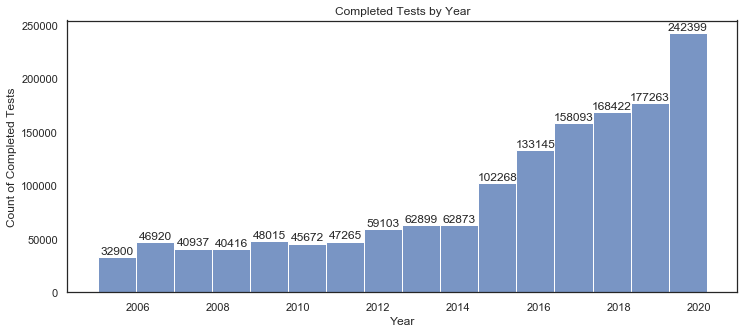

In [51]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

Birth Sex & Gender Identity Fixes

In [52]:
comp1.birthsex.unique()

array([nan,  2.,  1.])

In [53]:
comp1.groupby('birthsex').count()

,session_id,session_status,study_name,date,month,day,year,hour,weekday,birthyear,...,age,num,sex,countrycit,countryres,raceomb,politicalid,ethnic,genderidentity,occu_bp
birthsex,,,,,,,,,,,,,,,,,,,,,
1.0,78416,78416,78416,78416,78416,78416,78416,78416,78416,75508,...,0,27771,27771,27771,27771,25121,26770,0,78416,78416
2.0,154172,154172,154172,154172,154172,154172,154172,154172,154172,147705,...,0,53778,53778,53778,53778,48587,51538,0,154172,154172


In [54]:
comp1.loc[:, 'sex'].fillna(comp1.birthSex, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [55]:
comp1.loc[:, 'sex'].fillna(comp1.birthsex, inplace=True)

In [56]:
comp1.drop(columns=['birthsex', 'birthSex', 'genderIdentity', 'genderidentity'], inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


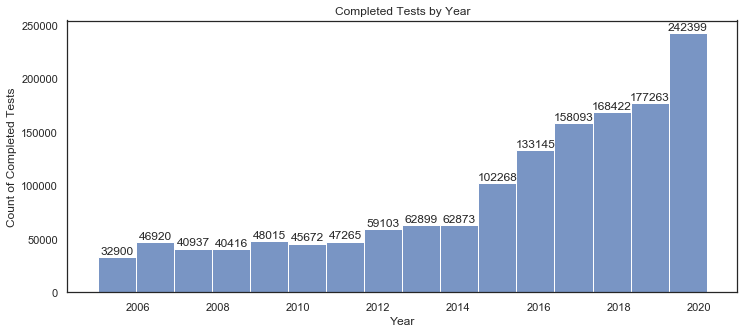

In [57]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [58]:
comp1.groupby('sex').count()

,session_id,session_status,study_name,date,month,day,year,hour,weekday,birthyear,...,MSAName,religionid,age,num,countrycit,countryres,raceomb,politicalid,ethnic,occu_bp
sex,,,,,,,,,,,,,,,,,,,,,
1.0,230428,230428,230428,230428,230428,230428,230428,230428,230428,220546,...,230428,223564,0,0,0,0,0,0,0,230428
2.0,481960,481960,481960,481960,481960,481960,481960,481960,481960,458974,...,481960,467282,0,0,0,0,0,0,0,481960
Female,401787,401787,401787,401787,401787,401787,401787,401787,401787,0,...,401787,268106,398585,401787,401787,401787,355656,386119,39336,382722
Male,171253,171253,171253,171253,171253,171253,171253,171253,171253,0,...,171253,104424,169743,171253,171253,171253,153465,166370,15026,164263
NaN,149373,149373,149373,149373,149373,149373,149373,149373,149373,78410,...,149373,82475,3298,149373,149373,149373,78354,83565,387,142528


In [59]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 36 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   birthyear       759174 non-null   float64
 10  ethnicityomb    1238710 non-null  object 
 11  raceomb_002     720451 non-null   object 
 12  raceombmulti    879322 non-null   object 
 13  Implicit        1442690 non-null  float64
 14  assocareer      1367103 non-null  object 
 15  assofamily      1365760 non-null  object 
 16  anninc          1178019 non-null  obje

Now to fix Ethnicity & Race... 

In [60]:
comp1.ethnicityomb.count(), comp1.ethnicityomb.unique(), len(comp1.ethnicityomb.unique())

(1238710,
 array([nan, 'Not Hispanic or Latino', 'Unknown', 'Hispanic or Latino'],
       dtype=object),
 4)

In [61]:
comp1.ethnic.count(), comp1.ethnic.unique(), len(comp1.ethnic.unique())

(54749,
 array([nan, 'White-Not of Hispanic Origin', 'Asian or Pacific Islander',
        'North American Indian or First Nation',
        'Black-Not of Hispanic Origin', 'Multi-racial (other)',
        'Other or Unknown', 'Multi-racial (Black and White)', 'Hispanic'],
       dtype=object),
 9)

In [62]:
comp1.raceomb.count(), comp1.raceomb.unique(), len(comp1.raceomb.unique())

(587475,
 array([nan, 'White', 'More than one race - Black/White',
        'More than one race - Other', 'Other or Unknown', 'South Asian',
        'American Indian/Alaska Native', 'Black or African American',
        'East Asian', 'Native Hawaiian or other Pacific Islander'],
       dtype=object),
 10)

In [63]:
comp1.raceomb_002.count(), comp1.raceomb_002.unique(), len(comp1.raceomb_002.unique())

(720451,
 array([nan, 'White', 'Black or African American', 'East Asian',
        'Multiracial', 'Other or unknown',
        'Native Hawaiian or other Pacific Islander', 'South Asian',
        'American Indian/Alaska Native'], dtype=object),
 9)

In [64]:
comp1.loc[:, 'raceomb'].fillna(comp1.raceomb_002, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [65]:
comp1.replace({'More than one race - Black/White' : 'Multiracial'}, inplace = True)
comp1.replace({'More than one race - Other' : 'Multiracial'}, inplace = True)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [66]:
comp1.raceomb.count(), comp1.raceomb.unique(), len(comp1.raceomb.unique())

(1234090,
 array([nan, 'White', 'Black or African American', 'East Asian',
        'Multiracial', 'Other or unknown',
        'Native Hawaiian or other Pacific Islander', 'South Asian',
        'American Indian/Alaska Native', 'Other or Unknown'], dtype=object),
 10)

In [67]:
comp1.drop(columns=['ethnicityomb', 'raceomb_002', 'raceombmulti', 'ethnic'], inplace=True, axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


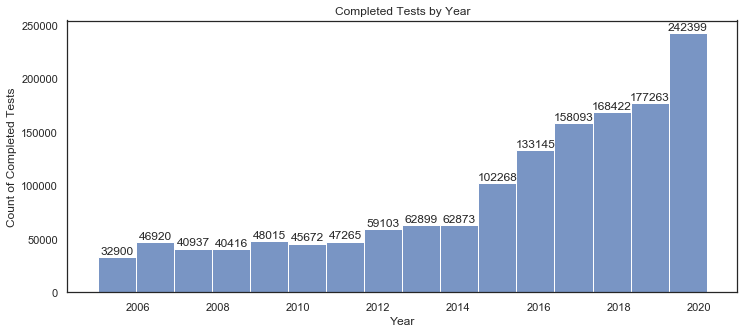

In [68]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(comp1.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

And on to Politics!!! 

In [69]:
comp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 32 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   birthyear       759174 non-null   float64
 10  Implicit        1442690 non-null  float64
 11  assocareer      1367103 non-null  object 
 12  assofamily      1365760 non-null  object 
 13  anninc          1178019 non-null  object 
 14  percentanninc   1224256 non-null  object 
 15  countrycit_num  770465 non-null   object 
 16  countryres_num  769638 non-null   obje

In [70]:
comp1.politicalid_7.count(), comp1.politicalid_7.unique(), len(comp1.politicalid_7.unique())

(1268500,
 array(['slightly conservative', nan, 'strongly liberal', 'neutral',
        'slightly liberal', 'moderately liberal', 'strongly conservative',
        'moderately conservative'], dtype=object),
 8)

In [71]:
comp1.politicalid.count(), comp1.politicalid.unique(), len(comp1.politicalid.unique())

(636054, array([nan,  6.,  7.,  5.,  4.,  3.,  2.,  1.]), 8)

In [72]:
pol2 = comp1.copy()

In [73]:
pol2.politicalid.replace(to_replace={1.0: "strongly conservative", 2.0: "moderately conservative", 3.0: "slightly conservative", 4.0: "neutral", 5.0: "slightly liberal", 6.0: "moderately liberal", 7.0: "strongly liberal"}, inplace=True)

In [74]:
pol2.politicalid_7.replace(to_replace={1.0: "strongly conservative", 2.0: "moderately conservative", 3.0: "slightly conservative", 4.0: "neutral", 5.0: "slightly liberal", 6.0: "moderately liberal", 7.0: "strongly liberal"}, inplace=True)

In [75]:
# pol2.politicalid.count(), pol2.politicalid.unique(), len(pol2.politicalid.unique())

In [76]:
pol2.loc[:, 'politicalid_7'].fillna(comp1.politicalid, inplace=True)

pol2.drop() DROP POL ID when you get back 

In [78]:
pol2.drop(columns=['politicalid'], inplace=True, axis=1)

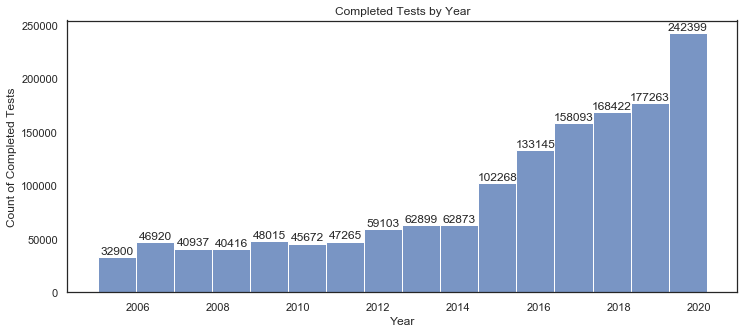

In [79]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(pol2.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [80]:
pol2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 31 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   birthyear       759174 non-null   float64
 10  Implicit        1442690 non-null  float64
 11  assocareer      1367103 non-null  object 
 12  assofamily      1365760 non-null  object 
 13  anninc          1178019 non-null  object 
 14  percentanninc   1224256 non-null  object 
 15  countrycit_num  770465 non-null   object 
 16  countryres_num  769638 non-null   obje

Fix Country Info

In [81]:
pol2.politicalid_7.value_counts()

neutral                    366970
moderately liberal         312468
strongly liberal           153417
slightly liberal           153099
moderately conservative    127969
slightly conservative      118940
strongly conservative       35637
4.0                         13999
3.0                         13144
5.0                         10627
6.0                          6154
2.0                          4398
1.0                          2059
Name: politicalid_7, dtype: int64

In [82]:
country = pol2.copy()

In [83]:
country[['countrycit_num', 'countryres_num', 'countrycit', 'countryres']].to_csv('data/country.csv')

In [84]:
country.loc[:, 'countryres'].fillna(country.countryres_num, inplace=True)

In [85]:
country.countryres.replace(to_replace={'US': 'U.S.A'}, inplace=True)

In [86]:
country.countryres.replace(to_replace={'U.S.A': 'U.S.A.'}, inplace=True)

In [87]:
country.countryres.count()

1413333

In [88]:
country.drop(columns=['countrycit_num', 'countryres_num', 'countrycit'], inplace=True)

In [89]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   birthyear       759174 non-null   float64
 10  Implicit        1442690 non-null  float64
 11  assocareer      1367103 non-null  object 
 12  assofamily      1365760 non-null  object 
 13  anninc          1178019 non-null  object 
 14  percentanninc   1224256 non-null  object 
 15  edu_14          1344320 non-null  object 
 16  politicalid_7   1318881 non-null  obje

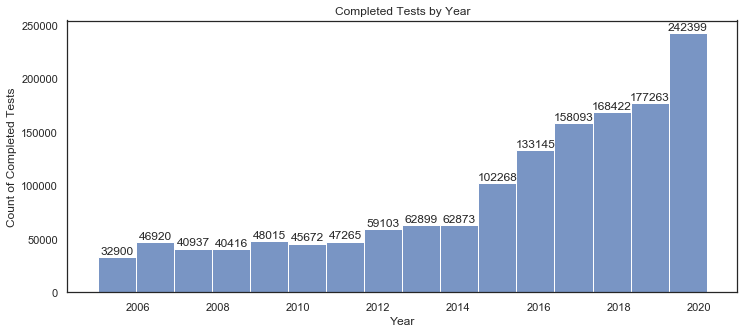

In [90]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(country.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

Age is next: 

In [91]:
age4 = country.copy()

In [92]:
age4.birthyear.count()

759174

In [93]:
age4.age.count()

571626

In [94]:
age4['proper_age_calc'] = (age4['year'] - age4['birthyear']).where(age4['birthyear'] > 150)

In [95]:
age4.loc[:, 'age'].fillna((age4['birthyear']).where(age4['birthyear'] < 150), inplace=True)

In [96]:
age4.loc[:, 'proper_age_calc'].fillna((age4['birthyear']).where(age4['birthyear'] < 150), inplace=True)

In [98]:
age4[['age', 'birthyear', 'proper_age_calc']].to_csv('data/age.csv')

In [99]:
age4.loc[:, 'age'].fillna(age4.proper_age_calc, inplace=True)

In [100]:
age4.drop(columns=['proper_age_calc', 'birthyear'], inplace=True)

In [101]:
age4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 27 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   Implicit        1442690 non-null  float64
 10  assocareer      1367103 non-null  object 
 11  assofamily      1365760 non-null  object 
 12  anninc          1178019 non-null  object 
 13  percentanninc   1224256 non-null  object 
 14  edu_14          1344320 non-null  object 
 15  politicalid_7   1318881 non-null  object 
 16  STATE           1468590 non-null  obje

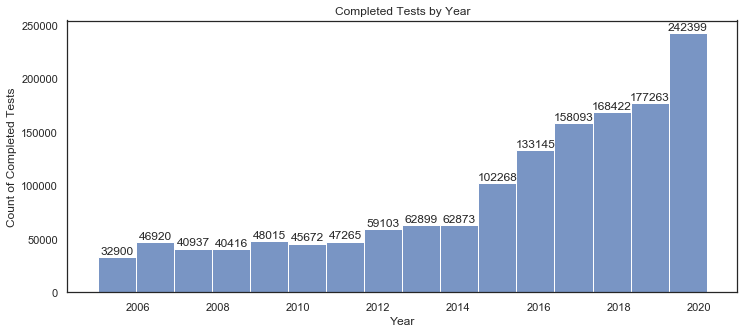

In [102]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(age4.year, binwidth=.95)
show_values_on_bars(ax)
ax.set(title='Completed Tests by Year', ylabel='Count of Completed Tests', xlabel='Year')
plt.show();

In [103]:
age4.drop(columns=['MSANo', 'MSAName'], inplace=True)

In [104]:
finaldf=age4.copy()

In [105]:
finaldf.politicalid_7.value_counts()

neutral                    366970
moderately liberal         312468
strongly liberal           153417
slightly liberal           153099
moderately conservative    127969
slightly conservative      118940
strongly conservative       35637
4.0                         13999
3.0                         13144
5.0                         10627
6.0                          6154
2.0                          4398
1.0                          2059
Name: politicalid_7, dtype: int64

In [106]:
finaldf.politicalid_7.replace(to_replace={1.0: "strongly conservative", 2.0: "moderately conservative", 3.0: "slightly conservative", 4.0: "neutral", 5.0: "slightly liberal", 6.0: "moderately liberal", 7.0: "strongly liberal"}, inplace=True)

In [107]:
finaldf.politicalid_7.to_csv('data/polwtf.csv')

In [108]:
finaldf.politicalid_7.value_counts()

neutral                    380969
moderately liberal         318622
slightly liberal           163726
strongly liberal           153417
moderately conservative    132367
slightly conservative      132084
strongly conservative       37696
Name: politicalid_7, dtype: int64

Some viz

''

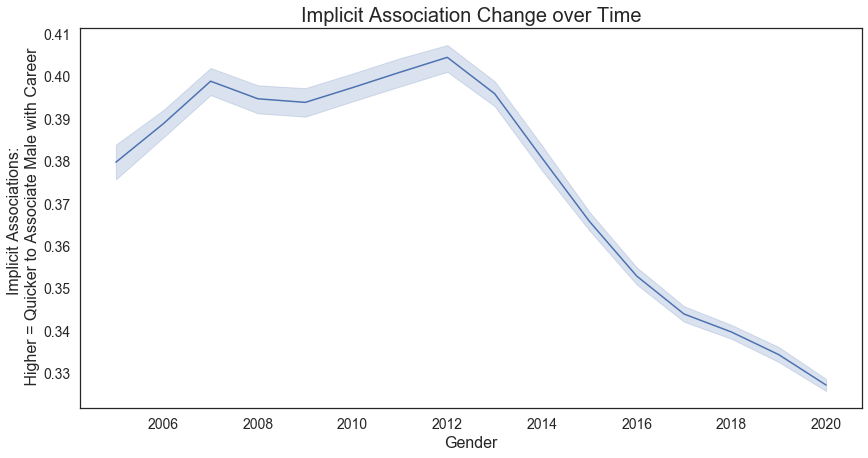

In [109]:
plt.figure(figsize=(14,7))

ax = sns.lineplot(x= 'year', y= 'Implicit', data=finaldf, palette='summer')
ax.set_title('Implicit Association Change over Time',fontsize=20)
ax.set_ylabel('Implicit Associations: \n Higher = Quicker to Associate Male with Career', fontsize=16)
ax.set_xlabel('Gender', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

''

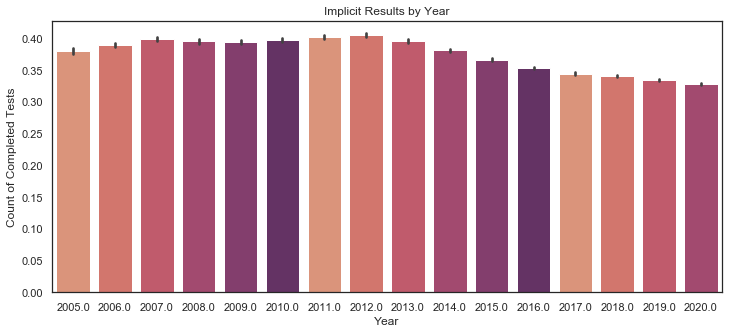

In [110]:
# Box & Whisker for Implicit results?? 

fig, ax = plt.subplots(figsize=(12, 5))

ax = sns.barplot(x= 'year', y="Implicit", data=finaldf, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Year')
ax.set_ylabel('Count of Completed Tests')
# show_values_on_bars(ax)
ax.set_xlabel('Year')
# plt.setp(ax.get_xticklabels())
# plt.setp(ax.get_yticklabels())

;

''

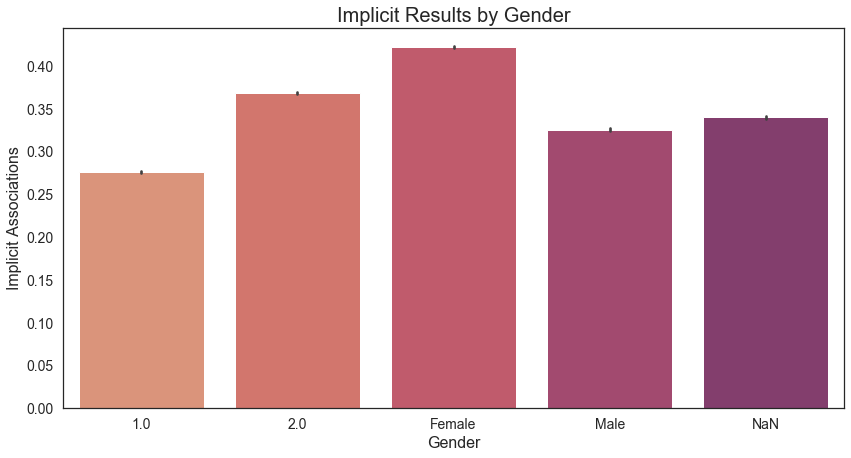

In [111]:
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'sex', y= 'Implicit', data=finaldf, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Gender',fontsize=20)
ax.set_ylabel('Implicit Associations', fontsize=16)
ax.set_xlabel('Gender', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

''

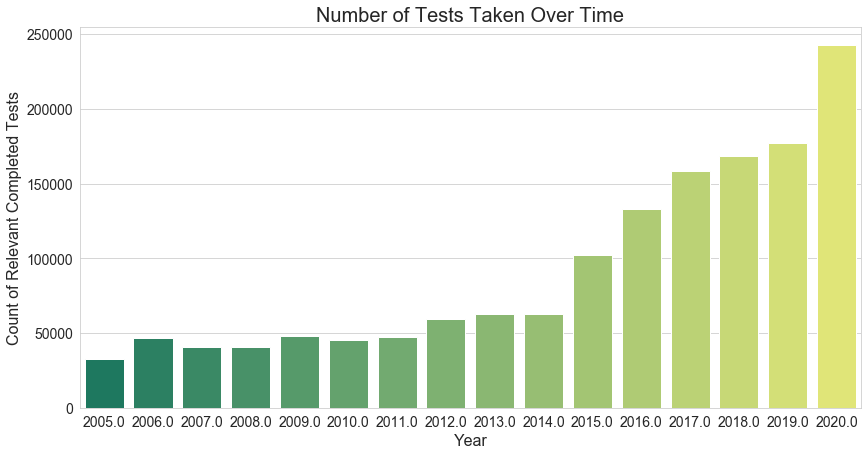

In [594]:
plt.figure(figsize=(14,7))

ax = sns.countplot(x= 'year', data=finaldf, palette='summer')
ax.set_title('Number of Tests Taken Over Time',fontsize=20)
ax.set_ylabel('Count of Relevant Completed Tests', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

;

#Take gradient off, should all be same color 

In [ ]:
# fig, ax = plt.subplots(nrows=2,ncols=2)

# vis1 = sns.histplot(finaldf["politicalid_7"], ax= ax[0][0])
# vis2 = sns.histplot(finaldf["Implicit"], bins=10, ax=ax[0][1])
# vis3 = sns.histplot(finaldf["age"], bins=10, ax=ax[1][0])
# vis4 = sns.histplot(finaldf["occu_bp"], ax=ax[1][1])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


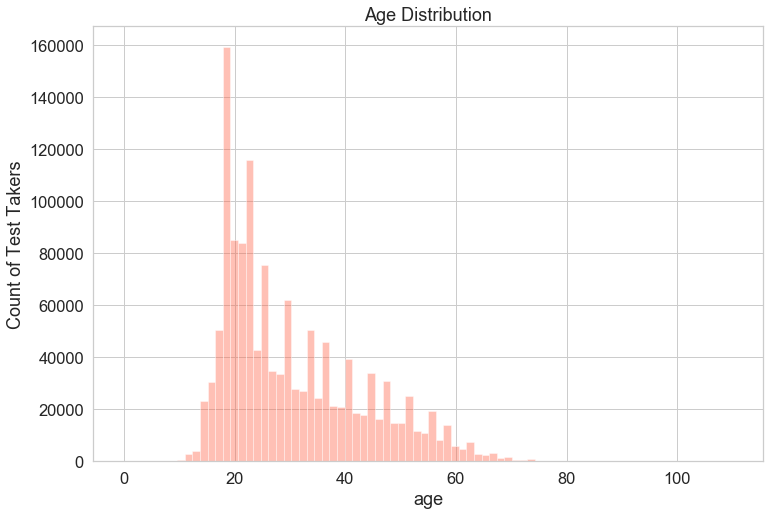

In [114]:
# source = https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python

with sns.plotting_context("notebook",font_scale=1.5):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    sns.set_style("whitegrid")
    sns.distplot(finaldf['age'].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count of Test Takers")

Something else I want to try  
multi = df.set_index(['Film', 'Chapter', 'Race', 'Character'])


In [115]:
# c_tests[
#     (c_tests.year == 'female')
#     & (titanic['class'].isin(['First', 'Third']))
#     & (titanic.age > 30)
#     & (titanic.survived == 0)
# ]

Correlations

Change scales (edu, politicalid, religionid, race) back to numeric for heatmap 

In [120]:
finaldf.assocareer.value_counts()

Neither male nor female    719040
Slightly male              277135
Moderately male            168969
Strongly male               73782
Slightly female             58792
Strongly female             35954
Moderately female           33431
Name: assocareer, dtype: int64

In [125]:
assocareer_dict = {"Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7}

In [126]:
assofamily_dict = {"Strongly female": 1, "Moderately female": 2, "Slightly female": 3, "Neither male nor female": 4, "Slightly male": 5, "Moderately male": 6, "Strongly male": 7}

In [127]:
finaldf.assocareer.replace(to_replace=assocareer_dict, inplace=True)

In [128]:
finaldf.assofamily.replace(to_replace=assocareer_dict, inplace=True)

In [130]:
edu_dict = {'elementary': 1, 'junior high': 2, 'some high school': 3, 'high school graduate': 4, 'some college': 5, 'associates degree': 6, 'bachelors degree': 7, 'some graduate school or beyond': 8}

In [135]:
edu_dict2 = {'elementary school': 1, 'junior high': 2, 'some high school': 3, 'high school graduate': 4, 'some college': 5, 'associate\'s degree': 6, 'bachelor\'s degree': 7, 'some graduate school': 8}

In [138]:
finaldf.edu_14.replace(to_replace=edu_dict2, inplace=True)

In [141]:
edu_dict3 = {"master's degree": 8, "other advanced degree": 8, "Ph.D.": 8, "M.D.": 8, "J.D.": 8, -999.0: 'NaN'}

In [142]:
finaldf.edu_14.replace(to_replace=edu_dict3, inplace=True)

In [143]:
finaldf.edu_14.value_counts()

8      410299
5      320647
7      294430
4      103672
3       96245
6       89448
NaN     14739
2       12540
1        2300
Name: edu_14, dtype: int64

In [146]:
pol_dict = {"strongly conservative": 1, "moderately conservative": 2, "slightly conservative": 3, "neutral": 4, "slightly liberal": 5, "moderately liberal": 6, "strongly liberal": 7}

In [147]:
finaldf.politicalid_7.replace(to_replace=pol_dict, inplace=True)

In [148]:
finaldf.politicalid_7.value_counts()

4.0    380969
6.0    318622
5.0    163726
7.0    153417
2.0    132367
3.0    132084
1.0     37696
Name: politicalid_7, dtype: int64

TO DO: RELIGION ID & RACE THEN CORR VIZ THEN ASSIGNMENT

In [150]:
rel_dict = {"not at all religious": 1, "slightly religious": 2, "moderately religious": 3, "strongly religious": 4}

In [152]:
finaldf.religionid.replace(to_replace=rel_dict, inplace=True)

In [153]:
finaldf.religionid.value_counts()

2.0    363086
1.0    348435
3.0    310114
4.0    125829
Name: religionid, dtype: int64

In [171]:
sex_dict = {'Male': 1, 'Female': 2}

In [172]:
finaldf.sex.replace(to_replace=sex_dict, inplace=True)

In [173]:
finaldf.sex.value_counts()

2.0    883747
1.0    401681
NaN    149373
Name: sex, dtype: int64

In [155]:
finaldf.raceomb.replace(to_replace='Other or unknown', value='Other or Unknown', inplace=True)

In [157]:
race_dict = {'White': 6, 'Black or African American': 5, 'Multiracial': 7, 'East Asian': 2, 'Other or Unknown': 8, 'South Asian': 3, 'American Indian/Alaska Native': 1, 'Native Hawaiian or other Pacific Islander': 4}

In [158]:
finaldf.raceomb.replace(to_replace=race_dict, inplace=True)

In [161]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468590 entries, 0 to 92163
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   session_id      1468590 non-null  float64
 1   session_status  1468590 non-null  object 
 2   study_name      1468590 non-null  object 
 3   date            1468590 non-null  float64
 4   month           1468590 non-null  float64
 5   day             1468590 non-null  float64
 6   year            1468590 non-null  float64
 7   hour            1468590 non-null  float64
 8   weekday         1468590 non-null  float64
 9   Implicit        1442690 non-null  float64
 10  assocareer      1367103 non-null  float64
 11  assofamily      1365760 non-null  float64
 12  anninc          1178019 non-null  object 
 13  percentanninc   1224256 non-null  object 
 14  edu_14          1344320 non-null  object 
 15  politicalid_7   1318881 non-null  float64
 16  STATE           1468590 non-null  obje

In [176]:
corrs = finaldf[['Implicit', 'assocareer', 'assofamily', 'anninc', 'edu_14', 'politicalid_7', 'age', 'raceomb', 'religionid', 'sex']].corr()
corrs

,Implicit,assocareer,assofamily,politicalid_7,age,raceomb,religionid
Implicit,1.000000,0.091195,-0.127903,-0.052299,0.045525,0.012385,0.055609
assocareer,0.091195,1.000000,0.000377,-0.106808,0.005947,-0.016676,0.067656
assofamily,-0.127903,0.000377,1.000000,0.000464,0.040384,-0.009514,-0.042122
politicalid_7,-0.052299,-0.106808,0.000464,1.000000,0.017871,-0.006538,-0.369428
age,0.045525,0.005947,0.040384,0.017871,1.000000,0.023562,-0.006960
raceomb,0.012385,-0.016676,-0.009514,-0.006538,0.023562,1.000000,-0.008682
religionid,0.055609,0.067656,-0.042122,-0.369428,-0.006960,-0.008682,1.000000


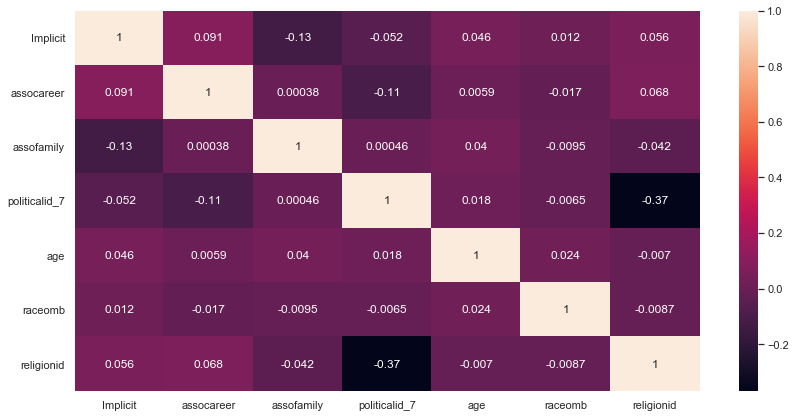

In [187]:
plt.figure(figsize=(14,7))

sns.heatmap(corrs, annot=True, fmt='.2g')
plt.show();

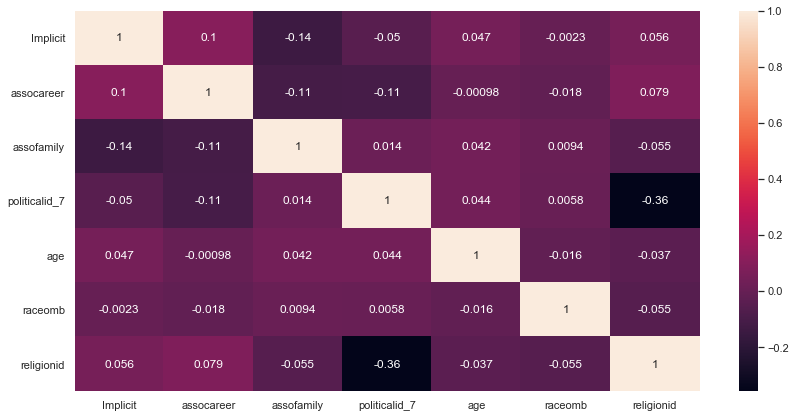

In [223]:
plt.figure(figsize=(14,7))

corr_s = finaldf[['Implicit', 'assocareer', 'assofamily', 'anninc', 'edu_14', 'politicalid_7', 'age', 'raceomb', 'religionid', 'sex']].corr(method = 'spearman')

sns.heatmap(corr_s, annot = True, fmt='.2g')

plt.show();

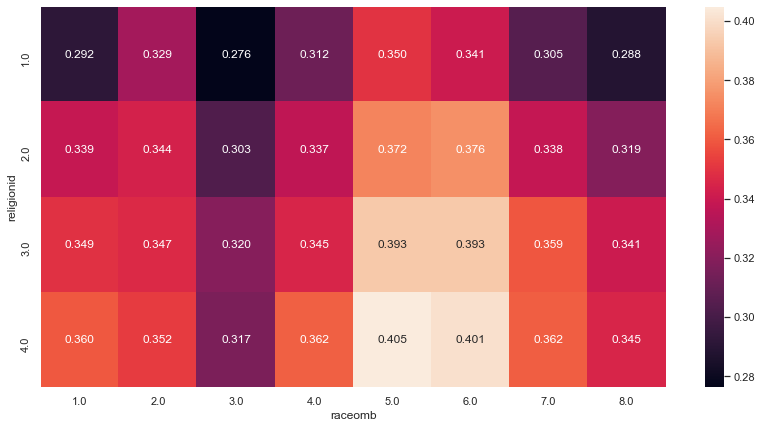

In [198]:
plt.figure(figsize=(14,7))

df_piv = finaldf.pivot_table(index='religionid', columns='raceomb', values='Implicit', aggfunc=np.mean)
sns.heatmap(df_piv, annot=True, fmt='.3f')

plt.show();

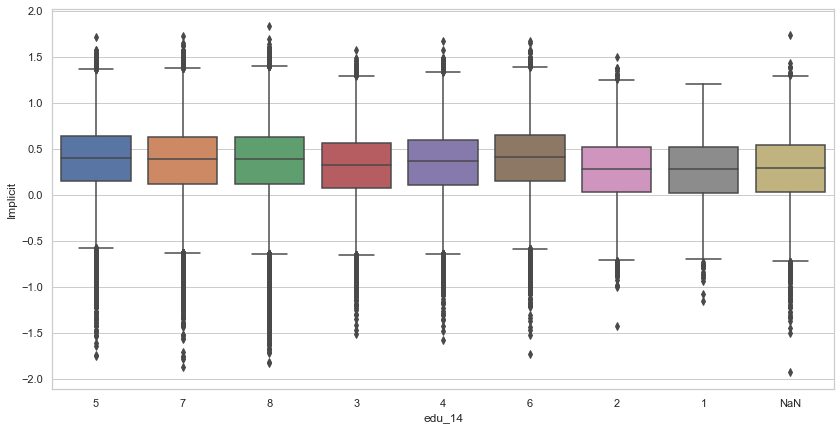

In [205]:
plt.figure(figsize=(14,7))
sns.boxplot(x="edu_14", y="Implicit", data=finaldf);

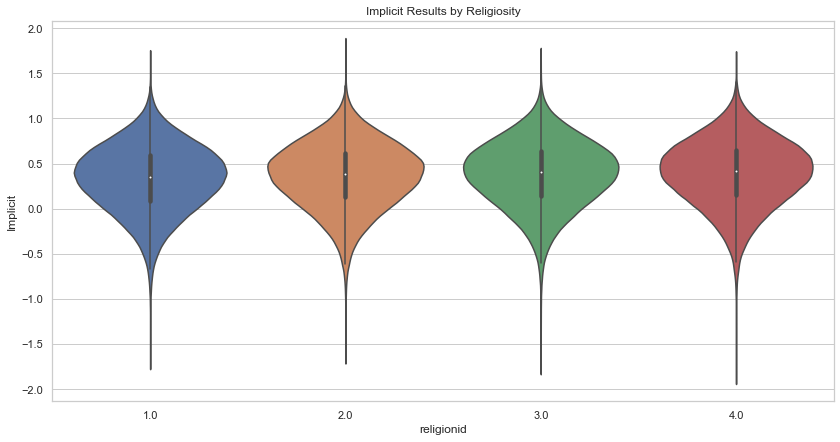

In [212]:
plt.figure(figsize=(14,7))

sns.violinplot(x="religionid", y="Implicit", data=finaldf)
plt.title('Implicit Results by Religiosity');

In [227]:
finaldf.Implicit.min(), finaldf.Implicit.max()

(-1.9234420591846053, 1.834496894436833)

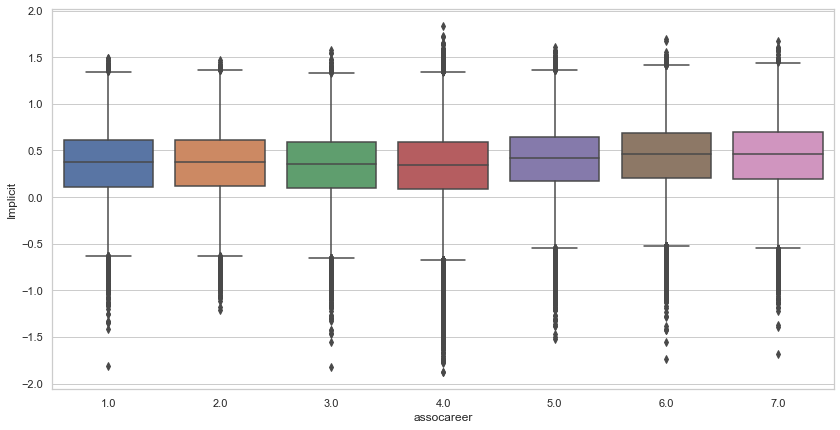

In [214]:
plt.figure(figsize=(14,7))
sns.boxplot(x="assocareer", y="Implicit", data=finaldf);

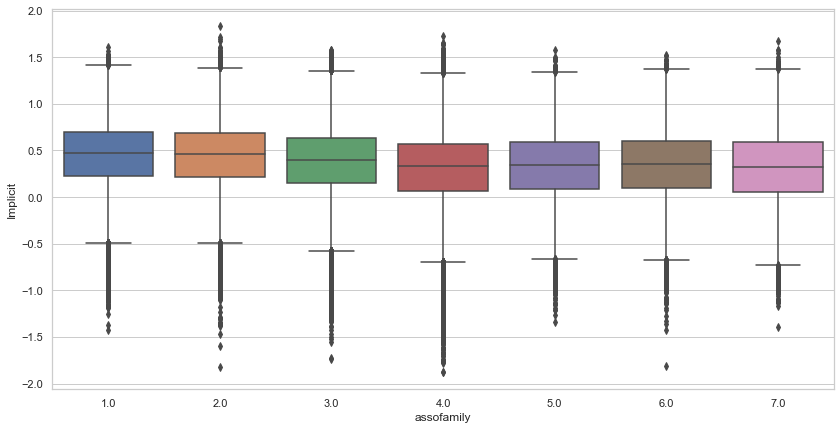

In [215]:
plt.figure(figsize=(14,7))
sns.boxplot(x="assofamily", y="Implicit", data=finaldf);

In [234]:
finaldf['age_groups'] = pd.cut(x=finaldf['age'], bins=[0, 18, 30, 50, 75, np.inf], ordered=True)

''

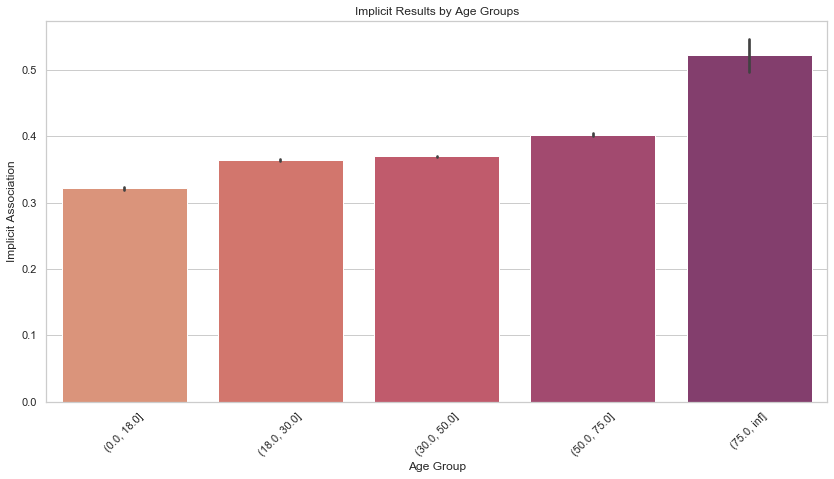

In [235]:
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'age_groups', y= 'Implicit', data=finaldf, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Age Groups')
ax.set_ylabel('Implicit Association')
ax.set_xlabel('Age Group')
plt.xticks(rotation=45)
;

In [237]:
finaldf.anninc.unique()

array(['$200,000+', nan, '$160,001 - $180,000', '$80,001 - $100,000',
       '$40,001 - $60,000', '$20,001 - $40,000', '0 - $20,000',
       '$180,001 - $200,000', '$120,001 - $140,000', '$60,001 - $80,000',
       '$140,001 - $160,000', '$100,001 - $120,000'], dtype=object)

In [239]:
finaldf.anninc.replace(to_replace={'$': '', ',': '_'}, inplace=True)

In [240]:
finaldf.anninc.value_counts()

0 - $20,000            173155
$200,000+              166187
$20,001 - $40,000      149998
$40,001 - $60,000      134382
$60,001 - $80,000      126549
$80,001 - $100,000     119283
$100,001 - $120,000    107032
$120,001 - $140,000     64594
$140,001 - $160,000     53027
$180,001 - $200,000     43103
$160,001 - $180,000     40709
Name: anninc, dtype: int64

In [242]:
# Put income into bins for stuff

''

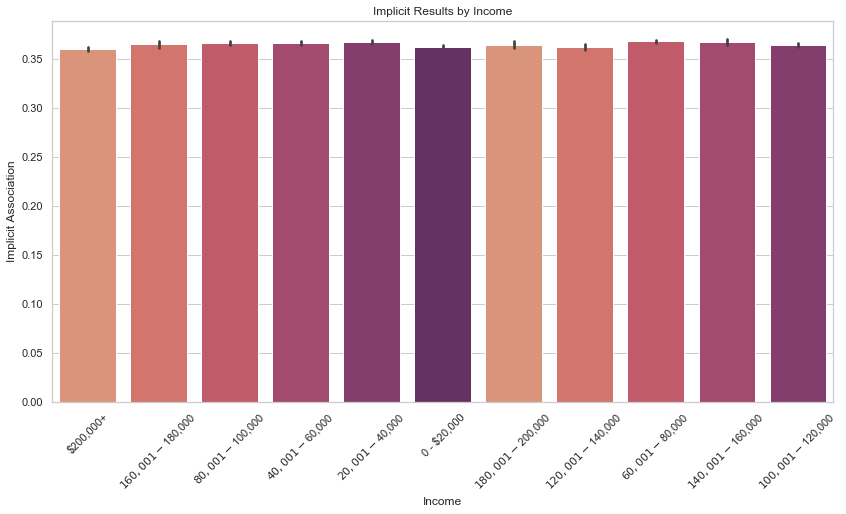

In [228]:
finaldf['income_groups'] = pd.cut(x=finaldf['anninc'], bins=[18, 30, 50, 75, np.inf], ordered=True)
plt.figure(figsize=(14,7))

ax = sns.barplot(x= 'anninc', y= 'Implicit', data=finaldf, palette=sns.color_palette('flare'))
ax.set_title('Implicit Results by Income')
ax.set_ylabel('Implicit Association')
ax.set_xlabel('Income')
plt.xticks(rotation=45)
;

In [199]:
import geopandas as gpd
import geoplot as gplt

ModuleNotFoundError: No module named 'geopandas'